In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler # standardization for feature scaling
from sklearn.model_selection import GridSearchCV # for hyperparameter tunning
from sklearn.model_selection import train_test_split # split the data into train and test
from sklearn.model_selection import learning_curve # check overfitting
from sklearn.ensemble import IsolationForest # anomaly detection
from sklearn.decomposition import PCA # principal component analysis
from sklearn.model_selection import RandomizedSearchCV #for hyperparameter tunning

#Model
from sklearn.tree import DecisionTreeClassifier #Decisiontree
from sklearn.ensemble import RandomForestClassifier # Randomforest
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.ensemble import GradientBoostingClassifier #gradientboosting
from sklearn.linear_model import LogisticRegression #logistic
from xgboost import XGBClassifier # xgboost
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.svm import SVC # support vector machine
from sklearn.ensemble import StackingClassifier # stacking
from sklearn.ensemble import BaggingClassifier # Bagging

#evaluators
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score,classification_report # for evaluation metrics



import warnings
warnings.filterwarnings('ignore') # ignore the warning

In [4]:
df=pd.read_csv("dataset.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [11]:
df["blue"].value_counts()

blue
0    1010
1     990
Name: count, dtype: int64

In [12]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [13]:
df.corr().loc[:,'price_range']


battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

# Explore data analysis

# 1) battery power and price range

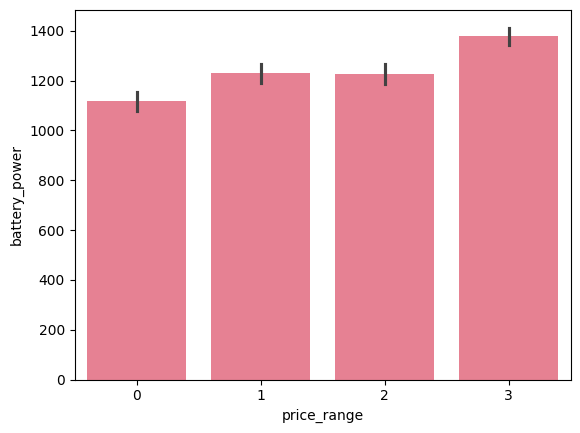

In [14]:
unique_colors = sns.color_palette("husl", len(df))
sns.barplot(data=df,y='battery_power',x='price_range',palette = unique_colors)
plt.show()

midrange and high are good battery power

# 2) ram and price range

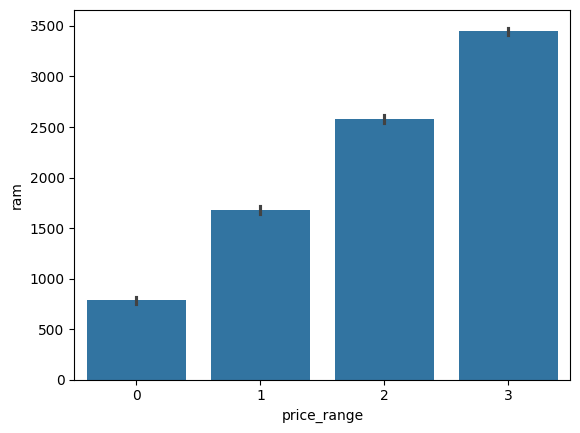

In [15]:

sns.barplot(data=df,y='ram',x='price_range')
plt.show()

increase the ram and also increase the price 

# 3) memeory and price 

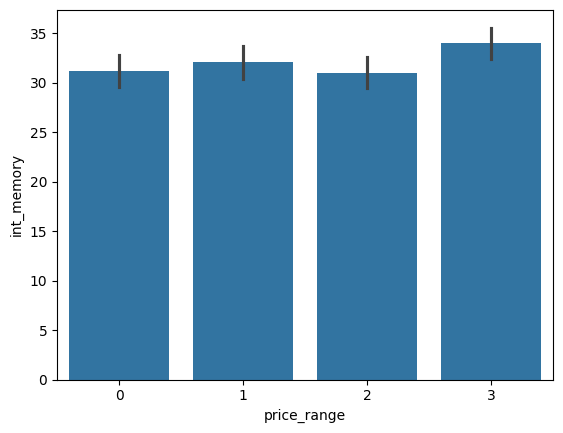

In [16]:
sns.barplot(data=df,x='price_range',y='int_memory')
plt.show()

there is no effect of price range for memory it good memory at any price 

# 4) font mega pixcel and price range

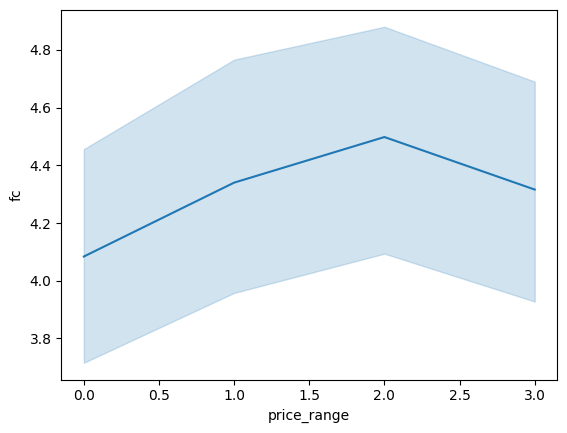

In [17]:
sns.lineplot(data=df,x='price_range',y='fc')
plt.show()

offer good camera front mega at high and midrange 

# 5) comapre 4g and 3g phons

<Axes: xlabel='three_g', ylabel='count'>

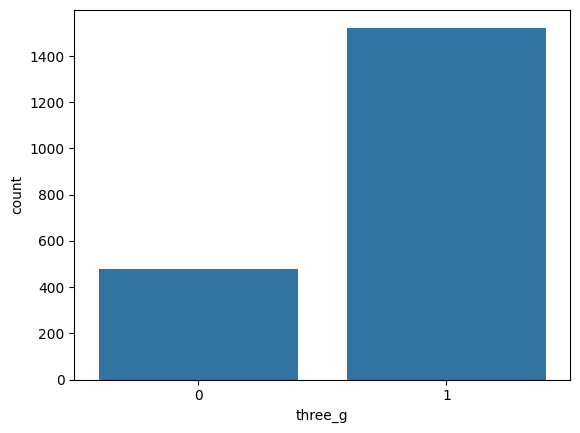

In [18]:
sns.countplot(data=df,x='three_g')       

In [19]:
df['three_g'].value_counts()     

three_g
1    1523
0     477
Name: count, dtype: int64

<Axes: xlabel='four_g', ylabel='count'>

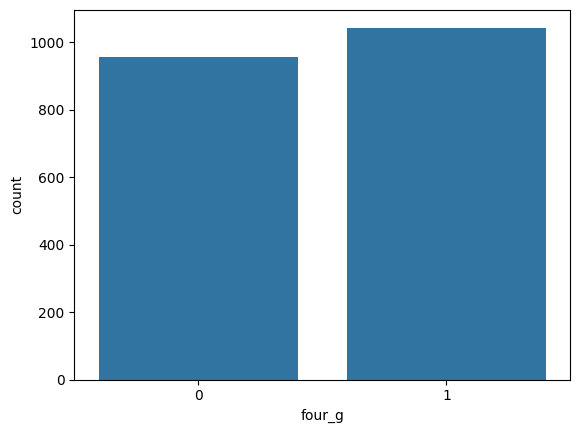

In [20]:
sns.countplot(data=df,x='four_g')   

In [21]:
df['four_g'].value_counts()  

four_g
1    1043
0     957
Name: count, dtype: int64

checking the outliers for all 

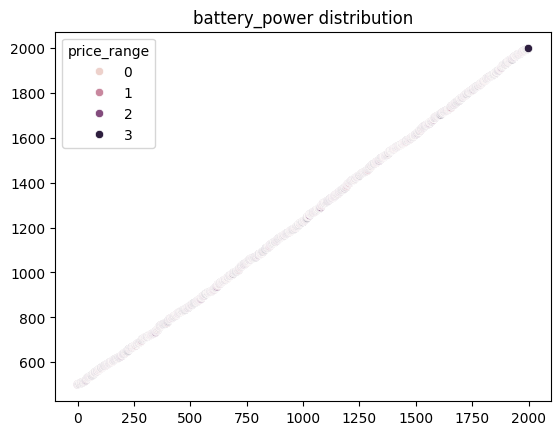

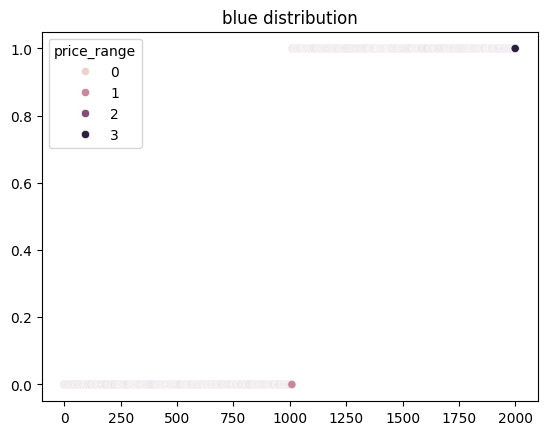

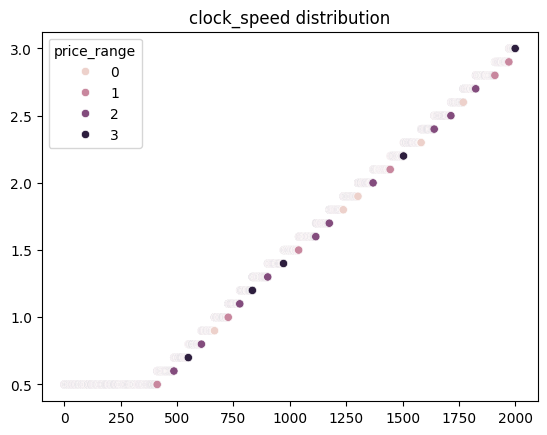

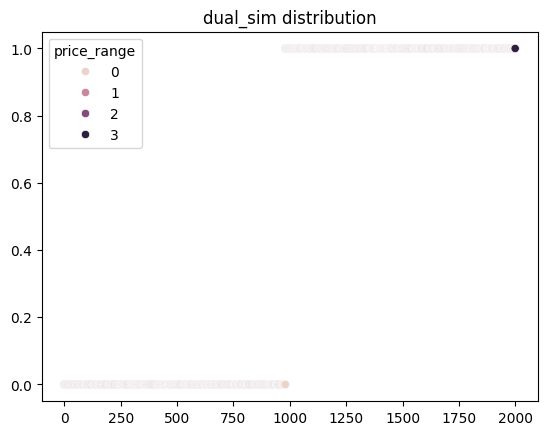

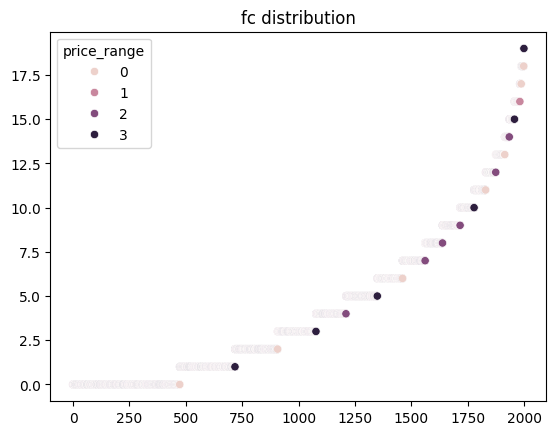

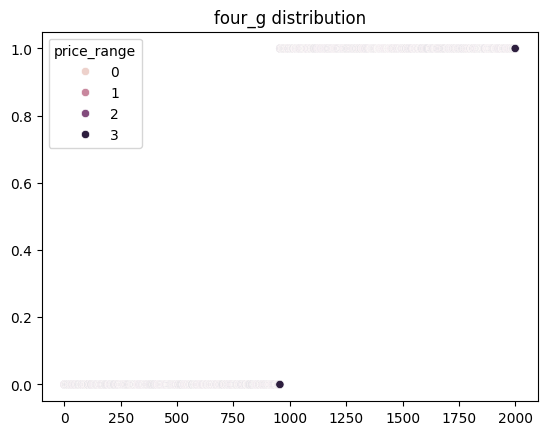

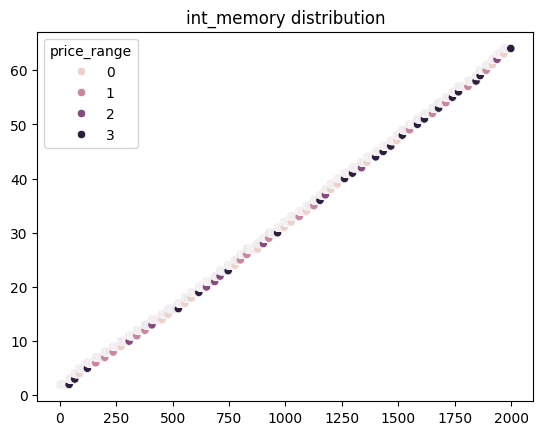

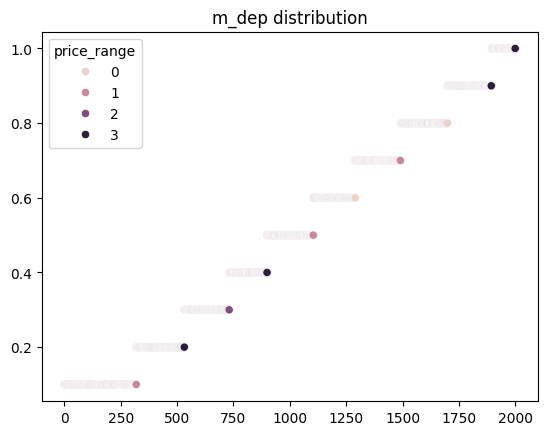

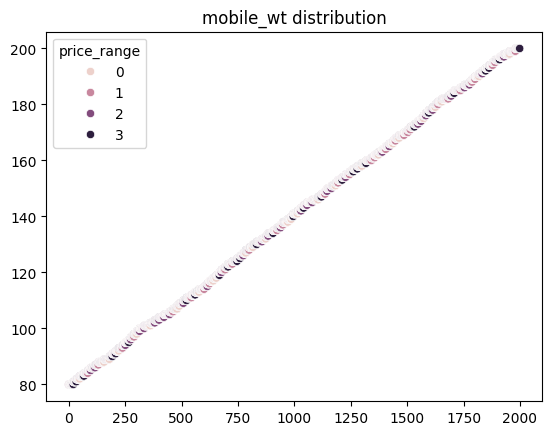

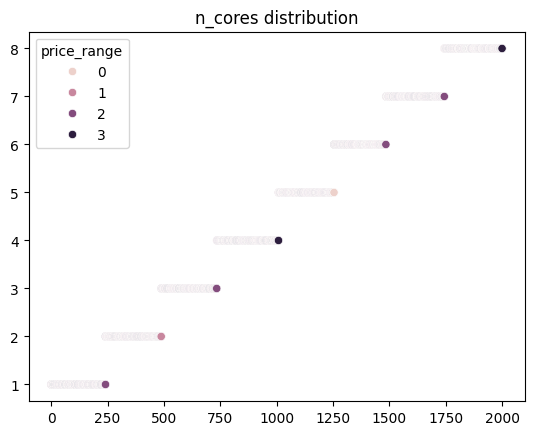

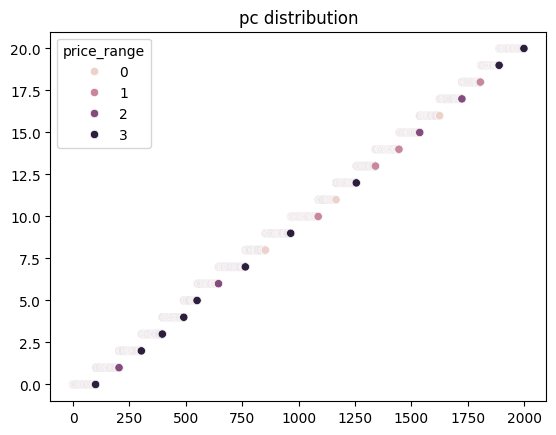

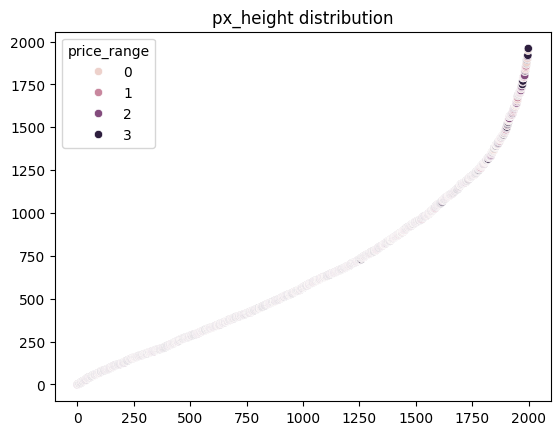

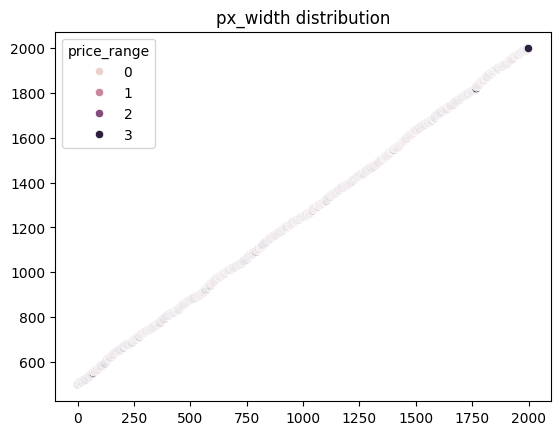

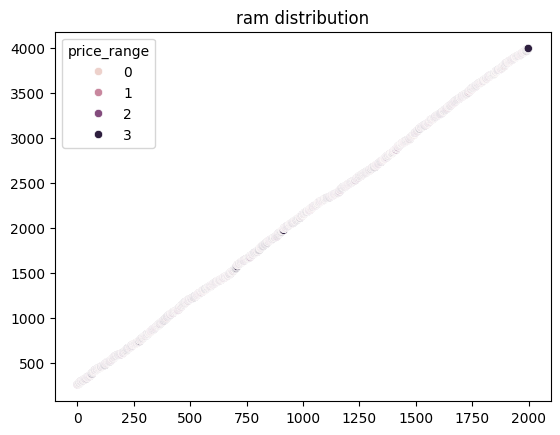

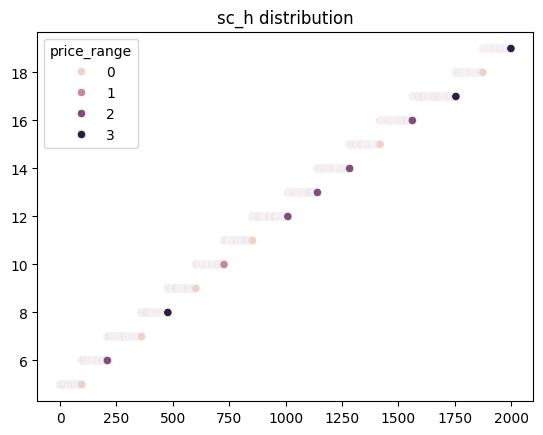

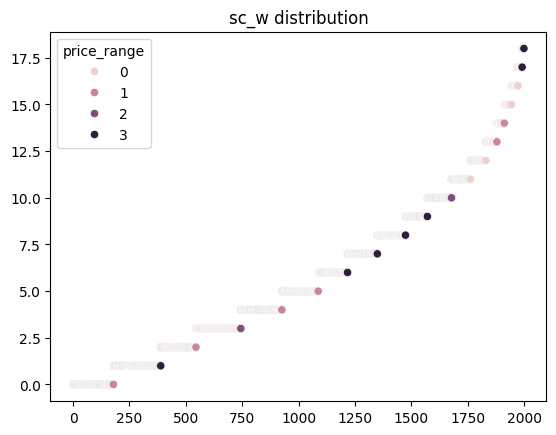

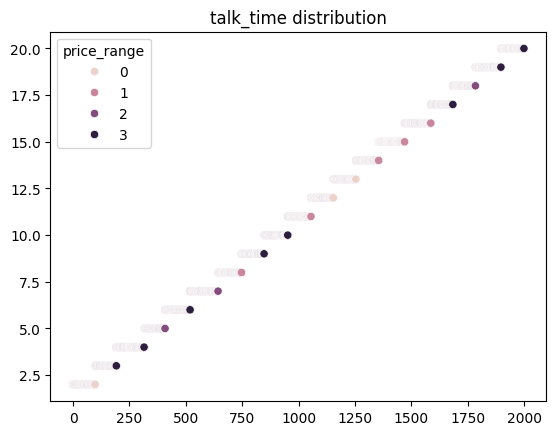

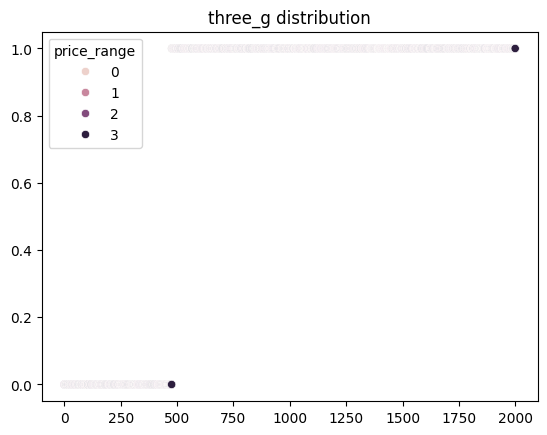

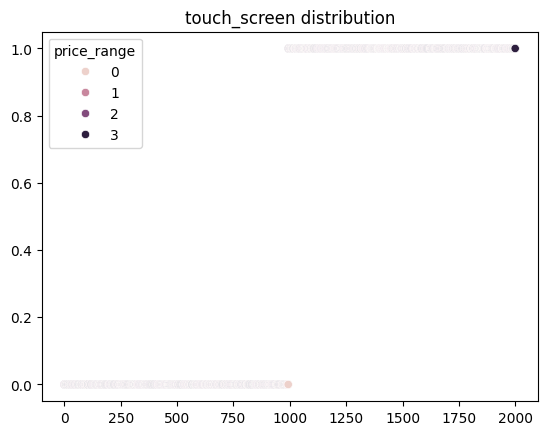

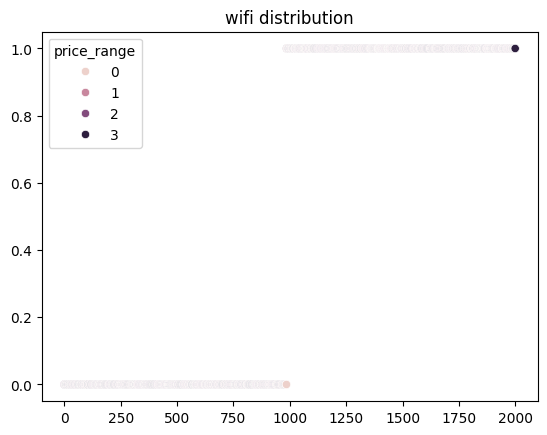

In [22]:
for i in (df.describe().columns[:-1]):
  sns.scatterplot(df,x=range(len(df[i])),y=np.sort(df[i]),hue='price_range')    
  plt.title(i+' distribution')
  plt.show()

# feature engineering

<function matplotlib.pyplot.show(close=None, block=None)>

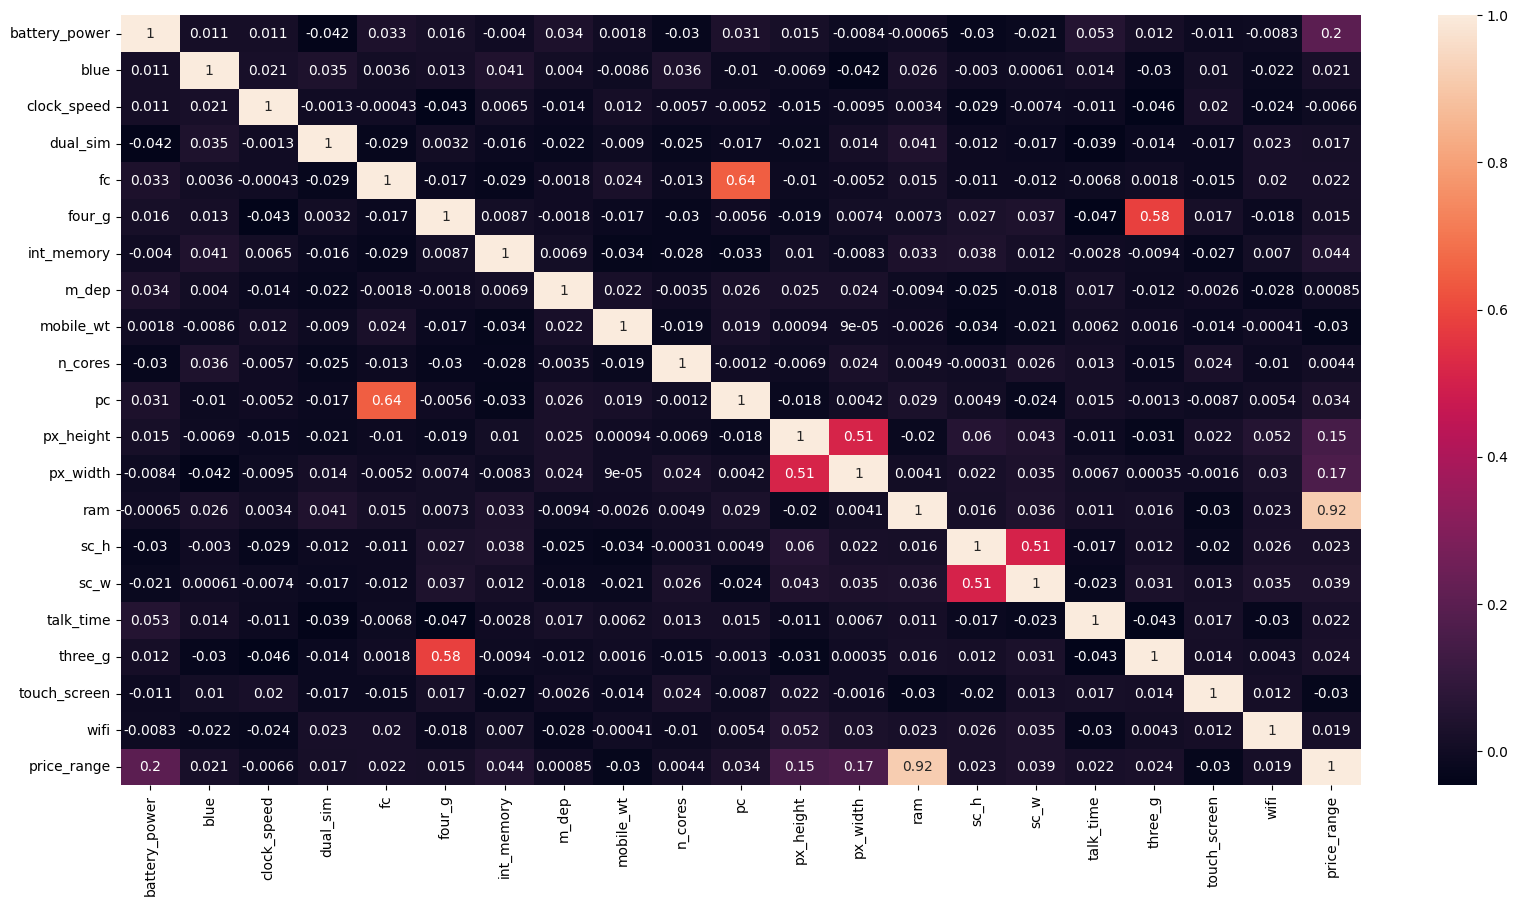

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show

acept ram there is no more highly releted

In [24]:

#Created a feature by combining px_height and px_width, hence we dropped both features.
df['Pixels Dimension']=df['px_height']*df['px_width']
df.drop(columns=['px_height','px_width'],inplace=True)

In [25]:
#Using function converted MB into GB.
def change(x):
  return x/1000

In [26]:
#Applied the above function
df['ram']=df['ram'].apply(change)

In [27]:
# 3G will work on 4G phones, but 4G won't work on 3G phones
df.drop(columns=['three_g'],inplace=True)

In [28]:
#Since most of the smartphones comes with bluetooth feature, hence we dropped Bluetooth feature. 
df.drop(columns=['blue'],inplace=True)

In [29]:
#Created a feature by combining sc_h and sc_w, hence we dropped both features.
df['Screen Dimension'] = df['sc_h']* df['sc_w']
df.drop(columns=['sc_h','sc_w'],inplace=True)

In [30]:

df.shape

(2000, 17)

In [31]:
#Defined price_range as dependent variable and rest all the features as independent variable 
dependent_variable ='price_range'
independent_varaible = list(set(df.columns.tolist())-{dependent_variable})

In [32]:
# stored the independent and dependent values in x and y variable respectively
x=df[independent_varaible].values
y=df[dependent_variable].values

In [33]:
# split the data into 4 parts x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)

# feature scalling 

In [34]:
stand = StandardScaler()

In [35]:
x_train = stand.fit_transform(x_train)
x_test = stand.transform(x_test)

# model implimentation 

In [36]:

# A function to check overfitting using learning curve
def check_overfit(model_name):
  train_sizes,train_scores,test_scores = learning_curve(model_name,x_train,y_train,cv=5)
  train_scores_mean = np.mean(train_scores,axis=1)
  test_scores_mean = np.mean(test_scores,axis=1)
  plt.plot(train_sizes,train_scores_mean,label='Training score')
  plt.plot(train_sizes,test_scores_mean,label='Test score')
  
  plt.title("learning curve")
  plt.xlabel("training set size")
  plt.ylabel("Accuracy score")
  plt.legend(loc='best')
  plt.show()

model 1 -DecisionTreeClassifier() implimentaion

In [37]:

# created an object for decision tree classifier and then fit the train dataset into this model.
dec =DecisionTreeClassifier()
dec.fit(x_train,y_train)


DecisionTreeClassifier()

In [38]:
#Predicting the model and checking the accuracy of the model
dec_pred = dec.predict(x_test)
dec_pred_accuracy = accuracy_score(dec_pred,y_test)
print(dec_pred_accuracy)

0.86


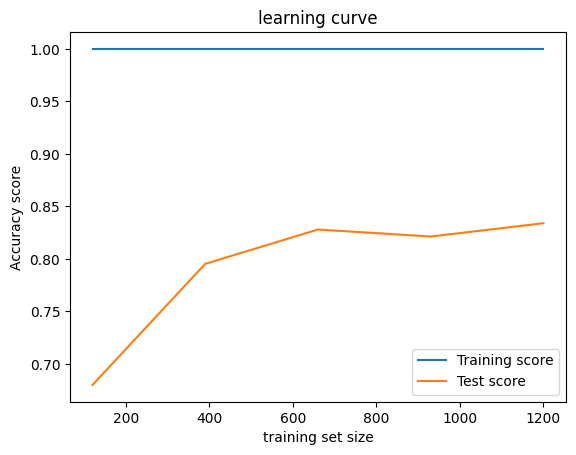

In [39]:
#learning curve
check_overfit(dec)

In [40]:
#Set the parameters in the model
param_grid=param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [10, 20],
    'min_impurity_decrease': [0, 0.1, 0.2]
}

In [41]:
#hyperparameter tunning using GridSearchCV 
pre_dec = DecisionTreeClassifier()
pre_dec = GridSearchCV(pre_dec,param_grid=param_grid,scoring='accuracy',cv=5)
pre_dec.fit(x_train,y_train)
pre_dec_pred = pre_dec.predict(x_test)
pre_dec_accuracy = accuracy_score(pre_dec_pred,y_test)
pre_dec_accuracy

0.832

In [42]:

#Got the best parameter through hyperparameter tunning
pre_dec.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [43]:
#Set the best parameter in this model 
dec =DecisionTreeClassifier(criterion='gini',
 max_depth= 10,
 max_leaf_nodes= 20,
 min_impurity_decrease= 0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 splitter= 'best')
dec.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, min_impurity_decrease=0)

In [44]:
#Predicting the model and checking accuracy after hyperparameter tunning
dec_pred = dec.predict(x_test)
dec_pred_accuracy = accuracy_score(dec_pred,y_test)
print(dec_pred_accuracy)

0.832


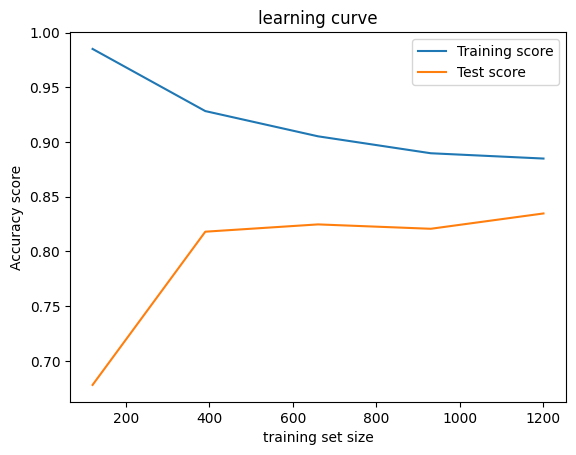

In [45]:
#Model is performing well after hyperparameter tunning.
check_overfit(dec)

# model 2 -random forest 

In [46]:
#Created an object for Random forest classifier, then trained the model and checking the accuracy of the model.
rf_tune = RandomForestClassifier(max_depth= 15,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 200)
rf_tune.fit(x_train,y_train)
rf_tune_pred = rf_tune.predict(x_test)
rf_tune_accuracy = accuracy_score(rf_tune_pred,y_test)
rf_tune_accuracy

0.894

# knn model 

In [47]:

#find the value of k.
error=[]
for i in range(1,1000):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  knn_pred = knn.predict(x_test)
  error.append(np.mean(knn_pred!=y_test))

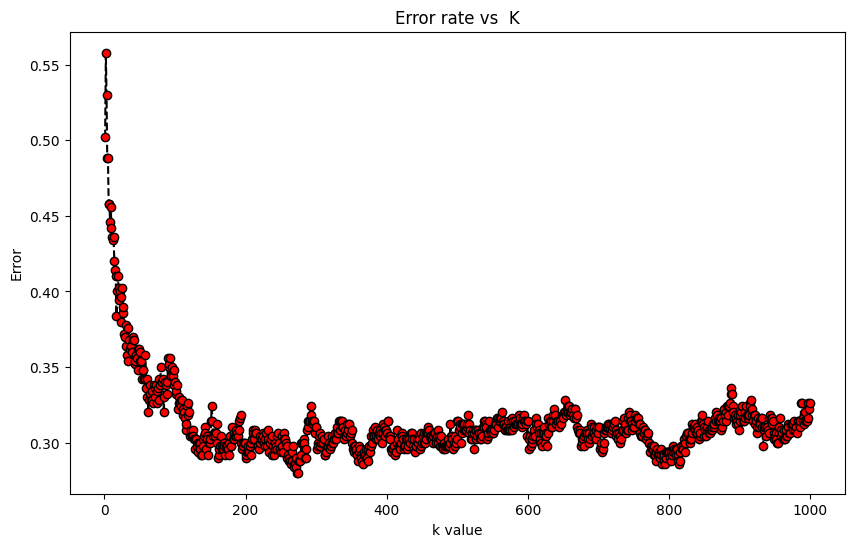

minimum error  0.28 at the value of k = 273


In [48]:
#Plotting line plot.
plt.figure(figsize=(10,6))
plt.plot(range(1,1000),error,color='black',linestyle='dashed',marker='o',markerfacecolor='red')
plt.title('Error rate vs  K')
plt.xlabel('k value')
plt.ylabel('Error')
plt.show()
print("minimum error ",min(error),"at the value of k =",error.index(min(error))+1)

In [49]:
#Created an object for KNN.
knn = KNeighborsClassifier(n_neighbors=273,p=1,weights='distance',metric= 'manhattan')

In [50]:

# Trained the model
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=273, p=1,
                     weights='distance')

In [51]:

#Model Prediction
knn_pred = knn.predict(x_test)

In [52]:
knn_accuracy = accuracy_score(knn_pred,y_test)
knn_accuracy

0.78

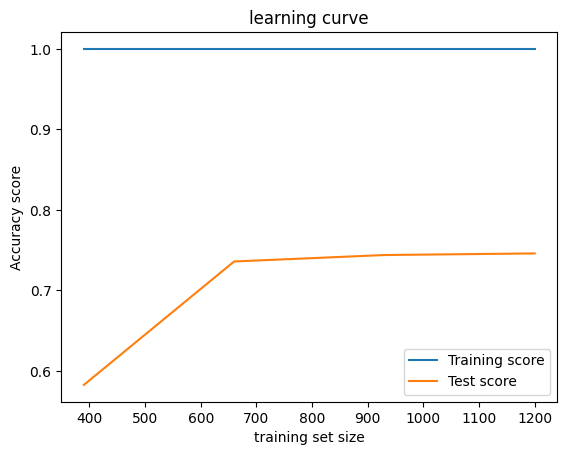

In [53]:
#Learning Curve
check_overfit(knn)

# model 4 -logistic regerssion

In [54]:
#Set the parameters in the model
parameter = {'penalty':['l1', 'l2', 'elasticnet'],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],'C':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10]}
     

In [55]:
#hyperparameter tuning in the model 
logi = LogisticRegression()
logi = GridSearchCV(logi,param_grid=parameter,scoring='accuracy',cv=5)

In [57]:
#Trained the model
logi.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [58]:

#Got the best parameter
logi.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [59]:

#Applied best parameter
logi_tune = LogisticRegression(C= 1, penalty= 'l1', solver= 'saga')

In [60]:

#Trained the using best parameters 
logi_tune.fit(x_train,y_train)

LogisticRegression(C=1, penalty='l1', solver='saga')

In [61]:
#Predicting the model and checked the accuracy of the model
logi_tune_pred = logi_tune.predict(x_test)
logi_tune_accuracy = accuracy_score(logi_tune_pred,y_test)
logi_tune_accuracy

0.948

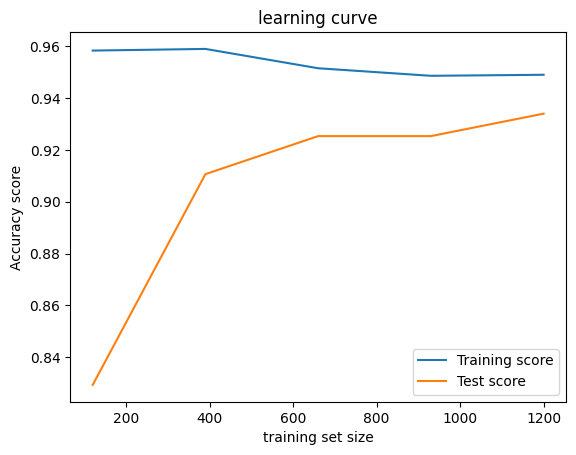

In [62]:

#Learning Curve 
check_overfit(logi_tune)
     

# model 5-naive bayes

In [63]:
nb=GaussianNB()

In [64]:
#Trained the model 
nb.fit(x_train,y_train)

GaussianNB()

In [65]:

#Model Prediction 
nb_pred = nb.predict(x_test)

In [66]:

#Checked the accuracy of the model
nb_accuracy = accuracy_score(nb_pred,y_test)
nb_accuracy

0.804

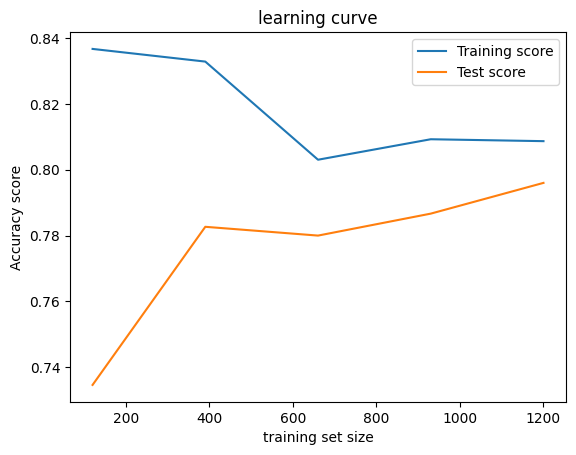

In [67]:
check_overfit(nb)

# model6= xboost 

In [68]:
#Set the parameters
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
  "min_child_weight" : [ 1, 3, 5, 7 ],
  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
 }
     

In [69]:

#Hyperparameter tunning and trained the model 
xgb= XGBClassifier()

random_search= RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='accuracy', verbose=3)

In [70]:

#Got the best parameters
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [71]:
#Best Estimator 
random_search.best_estimator_


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [72]:
#Model prediction 
xgb_pred = random_search.predict(x_test)

In [73]:
#Checked the accuracy
xg_boost_accuracy = accuracy_score(xgb_pred,y_test)

In [74]:

xg_boost_accuracy

0.896

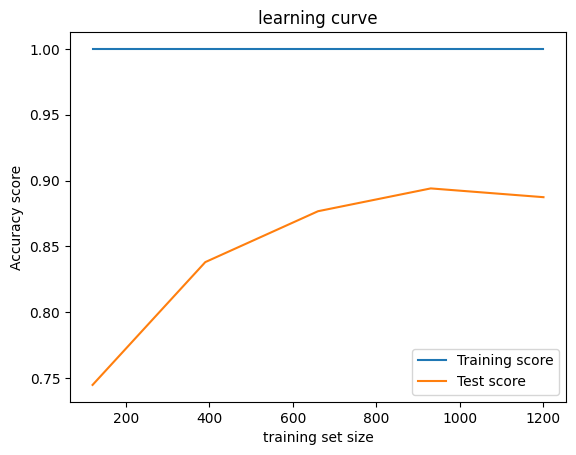

In [75]:
#Learning Curve 
check_overfit(xgb)

# model 7 - suport vector machine 

In [76]:
#Set the parameters
svc_params = {'C':range(5,10,2),
              'kernel':['rbf','linear', 'poly', 'sigmoid',]}


In [77]:
#Hyperparameter tunning and trained the model
svc_cv  = GridSearchCV(SVC(),param_grid=svc_params,cv=5,verbose=True,scoring='accuracy',n_jobs=-1)
svc_cv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(5, 10, 2),
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=True)

In [78]:

#got best parameters
svc_cv.best_params_

{'C': 5, 'kernel': 'linear'}

In [79]:
#Trained the model after using best parameters 
scv =SVC(C=5,kernel='linear')
scv.fit(x_train,y_train)

SVC(C=5, kernel='linear')

In [80]:

#Model prediction 
scv_pred = scv.predict(x_test)

In [81]:
#Checked the accuracy of the model 
scv_accuracy = accuracy_score(scv_pred,y_test)

In [82]:
scv_accuracy

0.942

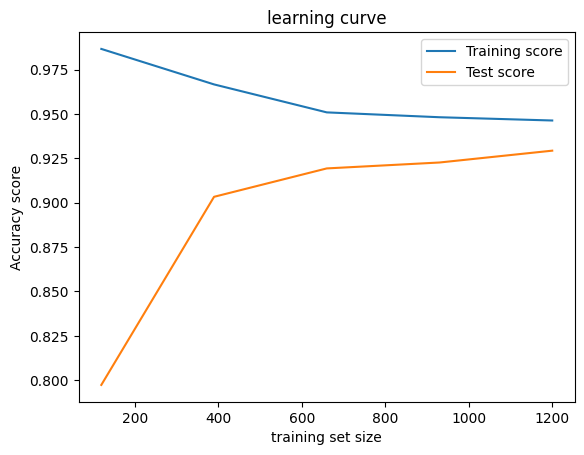

In [83]:
#Learning curve 
check_overfit(scv)

# model 8 - stacking 

In [84]:
#Set base models and final estimator
estimators = [('gbc',GradientBoostingClassifier()),('xgb',XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=15,
              min_child_weight=3, objective='multi:softprob')),
       ('bc',BaggingClassifier(estimator= SVC(C= 5, kernel= 'linear'),
 bootstrap= True,
 bootstrap_features= True,
 max_features= 1.0,
 max_samples= 0.8,
 n_estimators= 20))]

In [85]:
#Hyper parameter tunning
sc= StackingClassifier(estimators=estimators,passthrough=True,n_jobs=-1)

In [86]:

#Trained the model 
sc.fit(x_train,y_train)
     

StackingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0.3,
                                              grow_policy=None,
                                              importance_type=None,
                                              int...
                                              max_delta_step=None, max_depth=15,
                                              max_leaves=None,
                                              min_child_weight=3, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...)),
                               ('bc',
                                BaggingClassifier(bootstrap_features=True,
                                                  estimator=SVC(C=5,
                                                                kernel='linear'),
                                                  max_samples=0.8,
                                                  n_estimators=20))],
                   n_jobs=-1, passthrough=True)

In [87]:

#Model prediction 
sc_pred = sc.predict(x_test)

In [88]:

#Checked accuracy
sc_accuracy=accuracy_score(sc_pred,y_test)

In [89]:
sc_accuracy

0.918

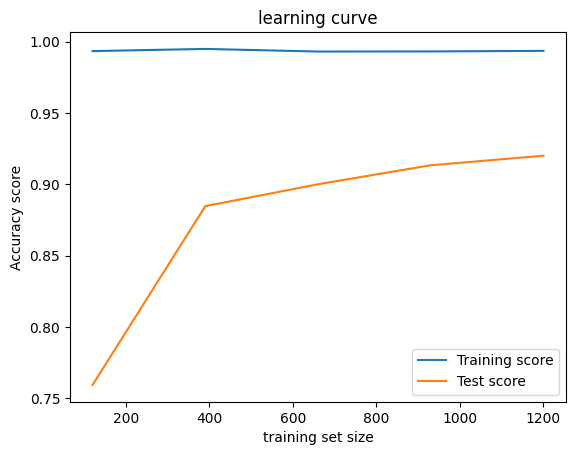

In [90]:

#Learning Curve
check_overfit(sc)

# Evaluation 

In [91]:
#set all the accuracy in data frame
evaluation = pd.DataFrame(data={'Model':['KNN classifier','DecisionTree classifier','LogisticRegression classifier','RandomForest classifier','Naive Bays','xgboost','Support Vector Machine','Stacking'], 'accuracy':[knn_accuracy,dec_pred_accuracy,logi_tune_accuracy,rf_tune_accuracy,nb_accuracy,xg_boost_accuracy,scv_accuracy,sc_accuracy]})

     

In [92]:
#sorting
evaluation=evaluation.sort_values(by=['accuracy'],ascending=False).reset_index(drop=True)

In [93]:
evaluation

,Model,accuracy
0,LogisticRegression classifier,0.948
1,Support Vector Machine,0.942
2,Stacking,0.918
3,xgboost,0.896
4,RandomForest classifier,0.894
5,DecisionTree classifier,0.832
6,Naive Bays,0.804
7,KNN classifier,0.780


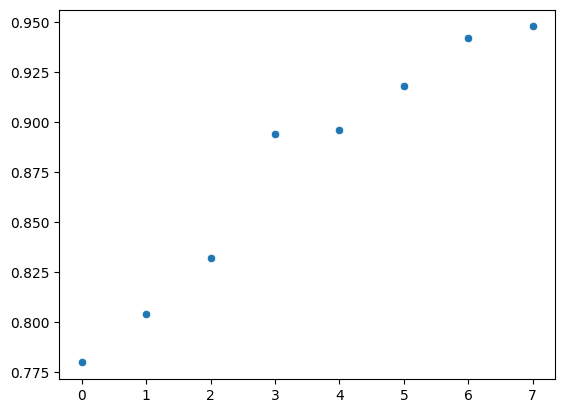

In [94]:
#plot the scatter
sns.scatterplot(x=range(len(evaluation['accuracy'])),y=np.sort(evaluation['accuracy']))
plt.show()

In [95]:
# confusion_matrix
def conf(x,y):
  sns.heatmap(confusion_matrix(x,y_test),annot=True)
  plt.title(y)
  plt.show()

def classi(x,y):
  print(y)
  print(classification_report(x,y_test))

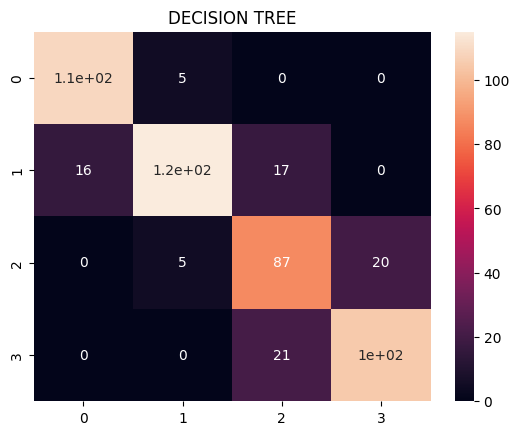

In [96]:
conf(pre_dec_pred,'DECISION TREE')

In [97]:

classi(pre_dec_pred,'DECISION TREE')

DECISION TREE
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       114
           1       0.92      0.78      0.84       148
           2       0.70      0.78      0.73       112
           3       0.84      0.83      0.84       126

    accuracy                           0.83       500
   macro avg       0.83      0.84      0.83       500
weighted avg       0.84      0.83      0.83       500



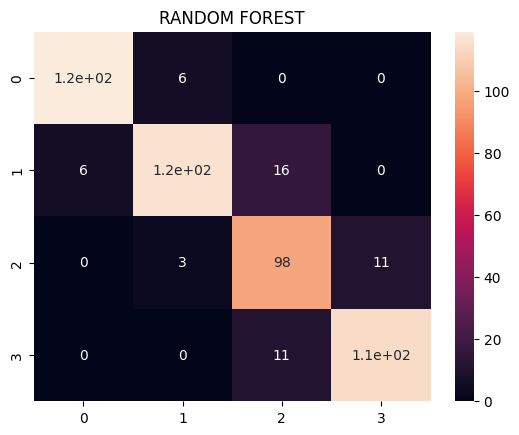

In [98]:

conf(rf_tune_pred,'RANDOM FOREST')

In [99]:

classi(rf_tune_pred,'RANDOM FOREST')

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       125
           1       0.93      0.84      0.88       138
           2       0.78      0.88      0.83       112
           3       0.91      0.91      0.91       125

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.90      0.89      0.89       500



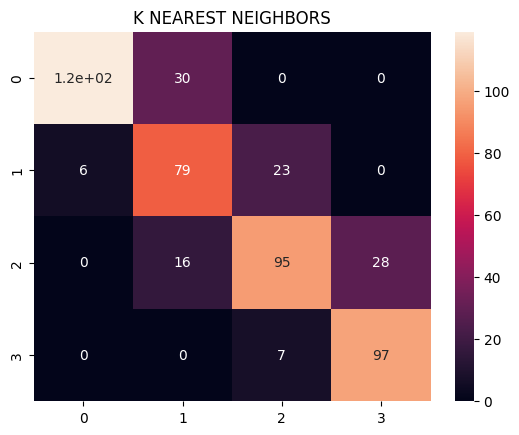

In [100]:
conf(knn_pred,'K NEAREST NEIGHBORS')

In [101]:

classi(knn_pred,'K NEAREST NEIGHBORS')

K NEAREST NEIGHBORS
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       149
           1       0.63      0.73      0.68       108
           2       0.76      0.68      0.72       139
           3       0.78      0.93      0.85       104

    accuracy                           0.78       500
   macro avg       0.78      0.79      0.78       500
weighted avg       0.79      0.78      0.78       500



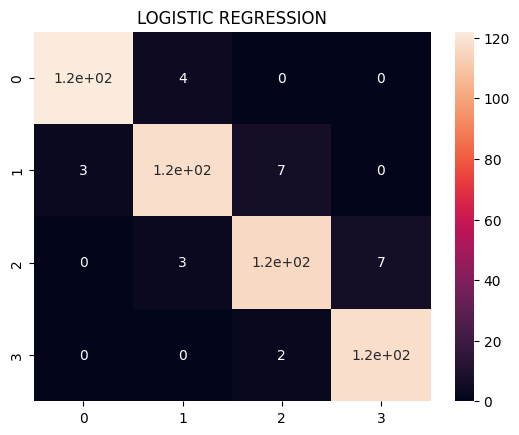

In [102]:

conf(logi_tune_pred,'LOGISTIC REGRESSION')

In [103]:

classi(logi_tune_pred,'LOGISTIC REGRESSION')

LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       126
           1       0.94      0.92      0.93       128
           2       0.93      0.92      0.92       126
           3       0.94      0.98      0.96       120

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



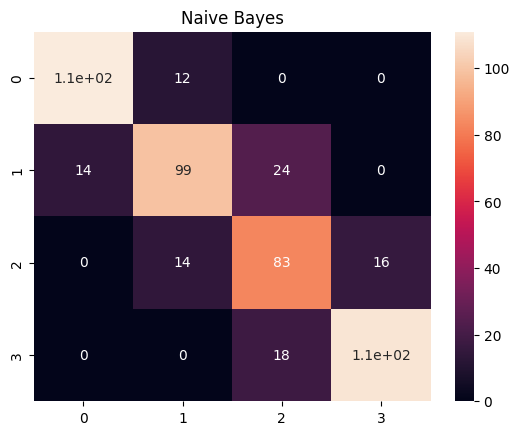

In [104]:
conf(nb_pred,'Naive Bayes')

In [105]:

classi(nb_pred,'Naive Bayes')

Naive Bayes
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       123
           1       0.79      0.72      0.76       137
           2       0.66      0.73      0.70       113
           3       0.87      0.86      0.87       127

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.81      0.80      0.80       500



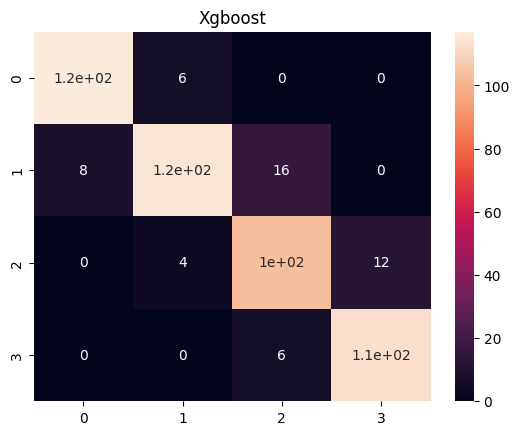

In [106]:
conf(xgb_pred,'Xgboost')

In [107]:

classi(xgb_pred,'Xgboost')

Xgboost
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       123
           1       0.92      0.83      0.87       139
           2       0.82      0.87      0.84       119
           3       0.90      0.95      0.93       119

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



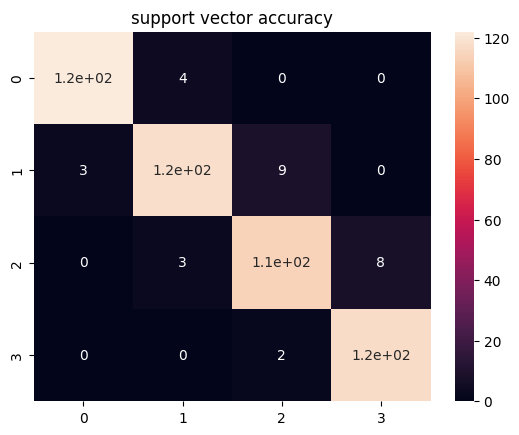

In [108]:
conf(scv_pred,'support vector accuracy')

In [110]:
classi(scv_pred,'support vector accuracy')

support vector accuracy
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       126
           1       0.94      0.91      0.93       130
           2       0.91      0.91      0.91       125
           3       0.94      0.98      0.96       119

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



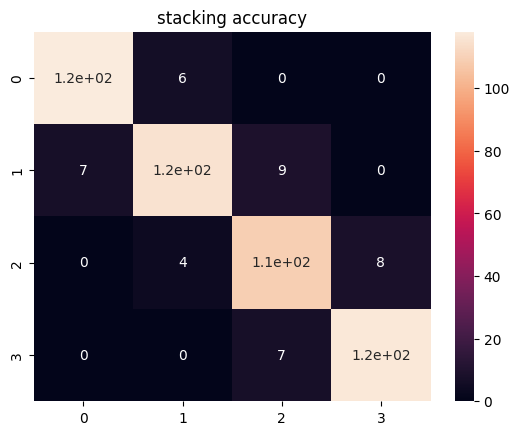

In [111]:
conf(sc_pred,'stacking accuracy')

In [112]:

classi(sc_pred,'stacking accuracy')

stacking accuracy
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       124
           1       0.92      0.88      0.90       131
           2       0.87      0.90      0.89       121
           3       0.94      0.94      0.94       124

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



# model exaplanability

In [114]:
# feature importance
features = independent_varaible
importances = rf_tune.feature_importances_
indices = np.argsort(importances)

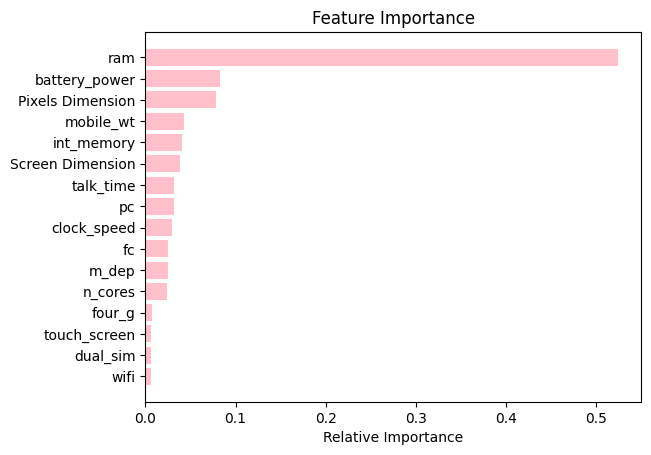

In [115]:
# plot the graph
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [116]:
# new dataframe with important features
new_df = df[['ram','battery_power','Pixels Dimension','mobile_wt','int_memory','Screen Dimension','talk_time','pc','clock_speed','fc','price_range']]
     

In [117]:

new_df.head()

,ram,battery_power,Pixels Dimension,mobile_wt,int_memory,Screen Dimension,talk_time,pc,clock_speed,fc,price_range
0,2.549,842,15120,188,7,63,19,2,2.2,1,1
1,2.631,1021,1799140,136,53,51,7,6,0.5,0,2
2,2.603,563,2167308,145,41,22,9,6,0.5,2,2
3,2.769,615,2171776,131,10,128,11,9,2.5,0,2
4,1.411,1821,1464096,141,44,16,15,14,1.2,13,1


In [118]:

new_df.shape

(2000, 11)

In [119]:
dependent_variable ='price_range'
independent_varaible = list(set(new_df.columns.tolist())-{dependent_variable})

In [120]:

x=new_df[independent_varaible].values
y=new_df[dependent_variable].values

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

In [122]:

stand = StandardScaler()
x_train = stand.fit_transform(x_train)
x_test = stand.transform(x_test)


In [123]:
vb = StackingClassifier(estimators=estimators,passthrough=True,n_jobs=-1)
vb.fit(x_train,y_train)
vb_pred = vb.predict(x_test)
vb_accuracy = accuracy_score(vb_pred,y_test)
vb_accuracy

0.932

In [124]:

vb.predict(x_train)

array([2, 3, 1, ..., 3, 0, 0])

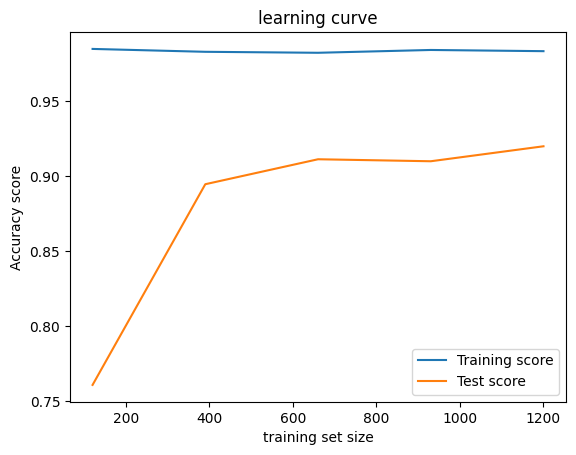

In [125]:

check_overfit(vb)

In [126]:

print(classification_report(vb_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       121
           1       0.90      0.93      0.91       121
           2       0.92      0.85      0.88       135
           3       0.94      0.96      0.95       123

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



In [127]:
pca= PCA(n_components=9)
x_train_1 = pca.fit_transform(x_train)
x_test_1 = pca.transform(x_test)
lv = StackingClassifier(estimators=estimators,passthrough=True,n_jobs=-1)
lv.fit(x_train_1,y_train)
y_pred = lv.predict(x_test_1)
print(accuracy_score(y_pred,y_test))

0.914


<Axes: >

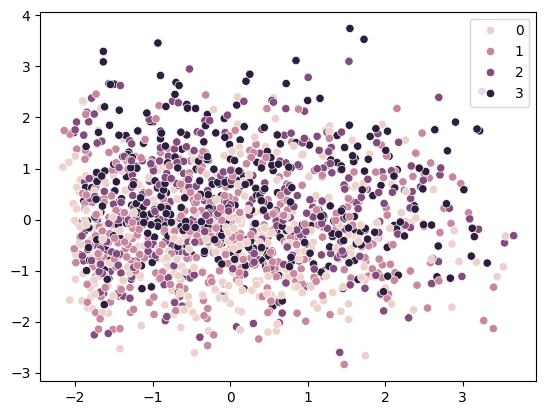

In [128]:


pca= PCA(n_components=2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)
sns.scatterplot(x=x_train_trf[:,0],y=x_train_trf[:,1],hue=y_train)

Conclusion
From EDA we can see that mid range and high mid range phones is offer good battery performance and expensive phones and mid range phone offer same specs in terms of front mega pixels camera but high mid range phones offer good front camera

There are some top features like Ram,battery_power,px_width,px_height, mobile_wt.

form all the above experiments we can conclude that Stacking and logistic regression gave the good results

we chose Stacking Classifier for deploying

# Deployment

In [129]:
# deployment using pickle
import pickle
import os

# Define the folder path for saving models
folder_path = r"C:\Users\Om\OneDrive\Desktop\machine learning\internship_project\models"

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Ensure `vb` is a trained model before saving
pickle.dump(vb, open(f"{folder_path}/vb.pkl", "wb"))  # Save model
pickle.dump(new_df, open(f"{folder_path}/new_df.pkl", "wb"))  # Save DataFrame

print("Model and DataFrame saved successfully!")



Model and DataFrame saved successfully!


In [131]:
import pickle

# Define the correct file path for vb.pkl
vb_file_path = r"C:\Users\Om\OneDrive\Desktop\machine learning\internship_project\models\vb.pkl"

# Load the trained model
model = pickle.load(open(vb_file_path, "rb"))

# Check the type of the loaded model
print("Loaded model type:", type(model))

Loaded model type: <class 'sklearn.ensemble._stacking.StackingClassifier'>
